# Housing Prices: Exploración de Variables
*Lau Tejada*
****

In [70]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [71]:
train = pd.read_csv('casas_entrena.csv')
test = pd.read_csv('casas_prueba.csv')

In [72]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,120,RM,nan,3072,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,225000
1,120,RL,53.000,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
2,120,RL,43.000,3013,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,213490
3,120,RL,53.000,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
4,120,RL,nan,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000


In [73]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1467, 80) 
The test data size before dropping Id feature is : (1203, 80) 


In [74]:

'''
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))
'''


'\n#check the numbers of samples and features\nprint("The train data size before dropping Id feature is : {} ".format(train.shape))\nprint("The test data size before dropping Id feature is : {} ".format(test.shape))\n\n#Save the \'Id\' column\ntrain_ID = train[\'Id\']\ntest_ID = test[\'Id\']\n\n#Now drop the  \'Id\' colum since it\'s unnecessary for  the prediction process.\ntrain.drop("Id", axis = 1, inplace = True)\ntest.drop("Id", axis = 1, inplace = True)\n\n#check again the data size after dropping the \'Id\' variable\nprint("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) \nprint("The test data size after dropping Id feature is : {} ".format(test.shape))\n'

## Data Processing

In [75]:
def clean_column(col):
    return col.lower().replace('/','_').replace(' ', '_')

In [76]:
train.rename(columns={col: clean_column(col) for col in train.columns.values}, inplace=True)
test.rename(columns={col: clean_column(col) for col in test.columns.values}, inplace=True)

In [77]:
train.columns.tolist()

['ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod_add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qu

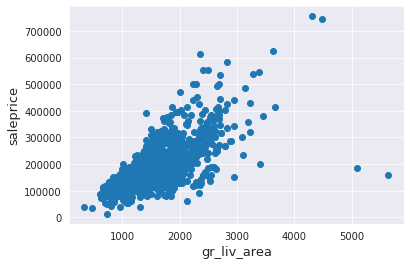

In [78]:
fig, ax = plt.subplots()
ax.scatter(x = train['gr_liv_area'], y = train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()

 Tenemos dos outliers con `gr_liv_area muy altos`, pero con el precio muy bajo. Vamos a eliminarlos.

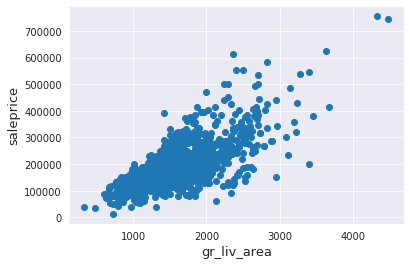

In [79]:
train = train.drop(train[(train['gr_liv_area']>4000) & (train['saleprice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['gr_liv_area'], train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()

## Variable Target


 mu = 180412.80 and sigma = 81107.68



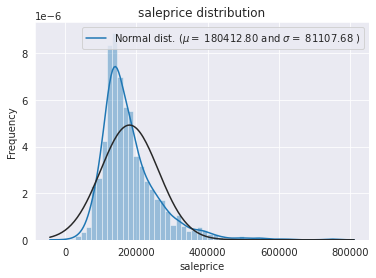

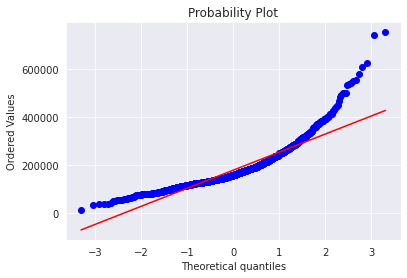

In [80]:
sns.distplot(train['saleprice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['saleprice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('saleprice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['saleprice'], plot=plt)
plt.show()

 Está sesgada a la derecha. Tenemos que transformarla para que se vea un poco más Normal.

#### Transformación log de la variable target, Sale Price


 mu = 12.02 and sigma = 0.41



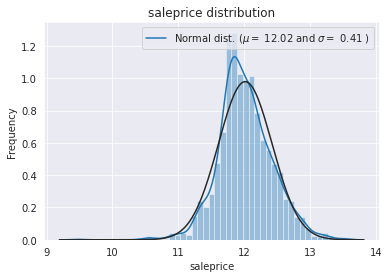

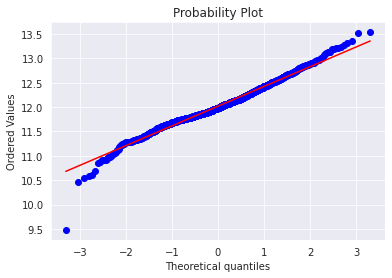

In [81]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["saleprice"] = np.log1p(train["saleprice"])

#Check the new distribution 
sns.distplot(train['saleprice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['saleprice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('saleprice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['saleprice'], plot=plt)
plt.show()

 Ahora los datos se distribuyen normales.

## Feature Engineering

 Unimos train y test:

In [82]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.saleprice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['saleprice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2668, 80)


### Valores Faltantes

In [83]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
pool_qc,99.588
misc_feature,96.252
alley,93.141
fence,79.948
id,54.910
fireplace_qu,48.126
lot_frontage,17.579
garage_yr_blt,5.060
garage_finish,5.060
garage_qual,5.060


Text(0.5, 1.0, 'Percent missing data by feature')

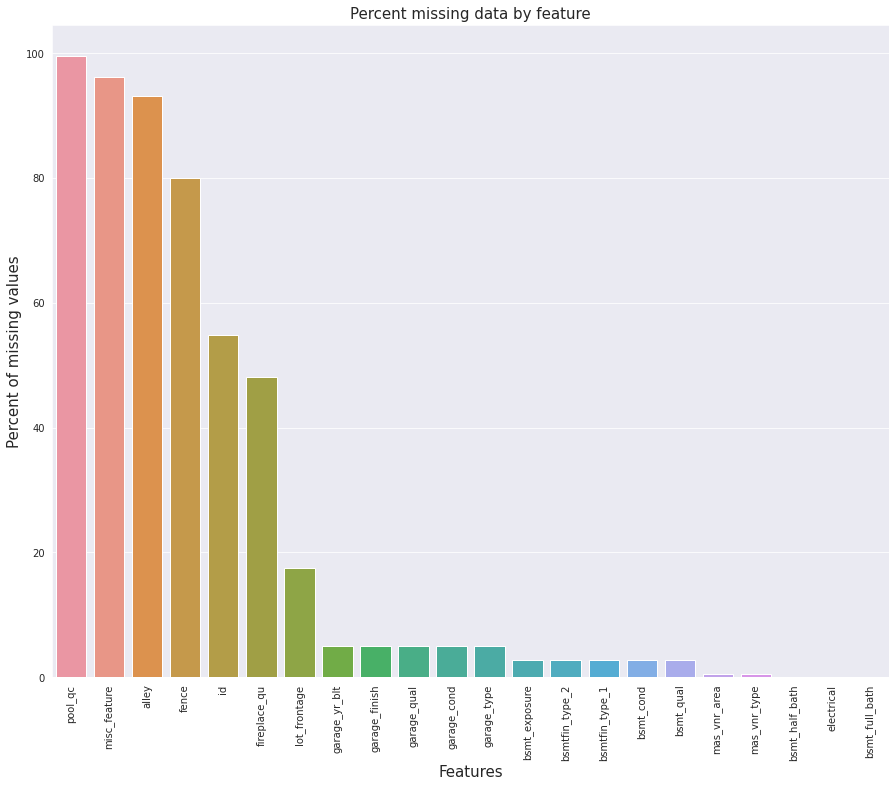

In [84]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Correlación

<AxesSubplot:>

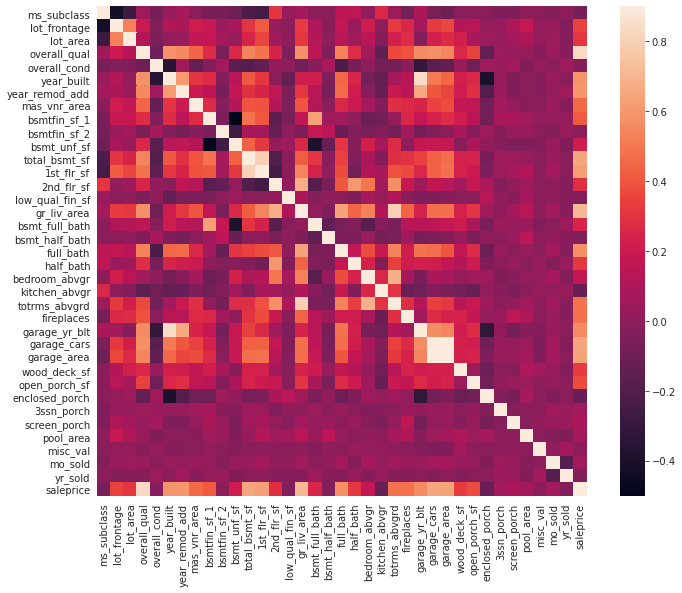

In [85]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Imputando Valores Faltantes

In [86]:
all_data["pool_qc"] = all_data["pool_qc"].fillna("None")
all_data["misc_feature"] = all_data["misc_feature"].fillna("None")
all_data["alley"] = all_data["alley"].fillna("None")
all_data["fence"] = all_data["fence"].fillna("None")
all_data["fireplace_qu"] = all_data["fireplace_qu"].fillna("None")

In [87]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["lot_frontage"] = all_data.groupby("neighborhood")["lot_frontage"].transform(
    lambda x: x.fillna(x.median()))

In [88]:
for col in ('garage_type', 'garage_finish', 'garage_qual', 'garage_cond'):
    all_data[col] = all_data[col].fillna('None')

In [89]:
for col in ('garage_yr_blt', 'garage_area', 'garage_cars'):
    all_data[col] = all_data[col].fillna(0)

In [90]:
for col in ('bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath'):
    all_data[col] = all_data[col].fillna(0)

In [91]:
for col in ('bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2'):
    all_data[col] = all_data[col].fillna('None')

In [92]:
all_data["mas_vnr_type"] = all_data["mas_vnr_type"].fillna("None")
all_data["mas_vnr_area"] = all_data["mas_vnr_area"].fillna(0)

In [93]:
all_data['ms_zoning'] = all_data['ms_zoning'].fillna(all_data['ms_zoning'].mode()[0])

In [94]:
all_data = all_data.drop(['utilities'], axis=1)

In [95]:
all_data["functional"] = all_data["functional"].fillna("Typ")

In [96]:
all_data['electrical'] = all_data['electrical'].fillna(all_data['electrical'].mode()[0])

In [97]:
all_data['kitchen_qual'] = all_data['kitchen_qual'].fillna(all_data['kitchen_qual'].mode()[0])

In [98]:
all_data['exterior_1st'] = all_data['exterior_1st'].fillna(all_data['exterior_1st'].mode()[0])
all_data['exterior_2nd'] = all_data['exterior_2nd'].fillna(all_data['exterior_2nd'].mode()[0])

In [99]:
all_data['sale_type'] = all_data['sale_type'].fillna(all_data['sale_type'].mode()[0])

In [100]:
all_data['ms_subclass'] = all_data['ms_subclass'].fillna("None")

In [101]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
id,54.910
lot_frontage,0.075


### Transformando variables numéricas que deberían de ser categóricas

In [102]:
#MSSubClass=The building class
all_data['ms_subclass'] = all_data['ms_subclass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['overall_cond'] = all_data['overall_cond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['yr_sold'] = all_data['yr_sold'].astype(str)
all_data['mo_sold'] = all_data['mo_sold'].astype(str)

## Label Encoding some categorical variables that may contain information in their ordering set
***
**Esto no lo entiendo**

In [103]:
from sklearn.preprocessing import LabelEncoder
cols = ('fireplace_qu', 'bsmt_qual', 'bsmt_cond', 'garage_qual', 'garage_cond', 
        'exter_qual', 'exter_cond','heating_qc', 'pool_qc', 'kitchen_qual', 'bsmtfin_type_1', 
        'bsmtfin_type_2', 'functional', 'fence', 'bsmt_exposure', 'garage_finish', 'land_slope',
        'lot_shape', 'paved_drive', 'street', 'alley', 'central_air', 'ms_subclass', 'overall_cond', 
        'yr_sold', 'mo_sold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2668, 79)


### Agregamos una variables más

In [104]:
# Adding total sqfootage feature 
all_data['total_sf'] = all_data['total_bsmt_sf'] + all_data['1st_flr_sf'] + all_data['2nd_flr_sf']

### Skewed features

In [105]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
misc_val,21.360
pool_area,17.734
lot_area,13.313
low_qual_fin_sf,12.771
3ssn_porch,11.749
land_slope,5.004
kitchen_abvgr,4.412
enclosed_porch,4.171
bsmtfin_sf_2,4.020
screen_porch,3.970


## Convirtiendo categóricas a variables dummy

In [107]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2668, 228)


In [112]:
pd.set_option('display.max_columns', 40)
all_data.head()

,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_slope,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,...,misc_feature_None,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,0,43.000,3072,1,1,3,0,7,4,2004,2004,18.000,2,4,2,5,3,2,1059,6,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,53.000,4045,1,1,3,0,7,4,2006,2006,45.000,2,4,2,5,0,2,1070,6,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,43.000,3013,1,1,3,0,7,4,2005,2005,145.000,2,4,2,5,1,2,16,6,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,53.000,3922,1,1,3,0,7,4,2006,2007,72.000,2,4,0,5,0,6,0,6,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,43.000,3196,1,1,3,0,8,4,2003,2003,40.000,2,4,2,5,1,6,0,6,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Separamos en train y test

In [109]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [110]:
train.shape

(1465, 228)

In [111]:
test.shape

(1203, 228)

In [114]:
#train.to_csv('houses_train.csv')
#test.to_csv('houses_test.csv')